In [38]:
import pandas as pd
import os
import glob
import pandas
import seaborn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
#Combining all files in one dataframe
path = r'C:\Users\KARAN\Documents\pandas\archive' #You can keep your own local path
all_files = glob.glob(os.path.join(path, '*.csv'))

df_from_each_file = (pd.read_csv(f) for f in all_files)
uber_df   = pd.concat(df_from_each_file, ignore_index=True)

In [12]:
#Converted Datetime to datatype DateTime understandable for Python - I have 4.5M records, but you can work with smaller dataset. 
uber_df['Date/Time'] = uber_df['Date/Time'].map(pandas.to_datetime)

In [16]:
#Add Date of Month
def get_dom(dt):
    return dt.day

uber_df['DOM'] = uber_df['Date/Time'].map(get_dom)

#Add Weekday Number
def get_weekday(dt):
    return dt.weekday()

uber_df['Weekday'] = uber_df['Date/Time'].map(get_weekday)

#Add Hour
def get_hour(dt):
    return dt.hour

uber_df['Hour'] = uber_df['Date/Time'].map(get_hour)

Text(0.5, 1.0, 'Frequency by DoM - Uber - Apr - Sept 2014')

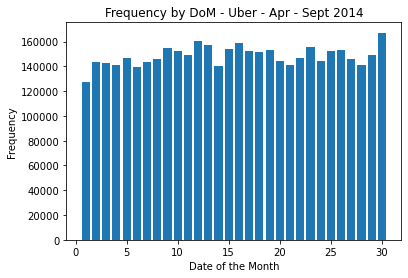

In [28]:
#Analyze the Date of Month
hist(uber_df.DOM, bins=30, rwidth = .8, range=(0.5, 30.5))
xlabel('Date of the Month')
ylabel('Frequency')
title('Frequency by DoM - Uber - Apr - Sept 2014')

(array([ 67227.,  45865.,  48287.,  55230.,  83939., 143213., 193094.,
        190504., 159967., 159148., 165703., 170452., 195877., 230625.,
        275466., 313400., 336190., 324679., 294513., 284604., 281460.,
        241858., 169190.,      0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <BarContainer object of 24 artists>)

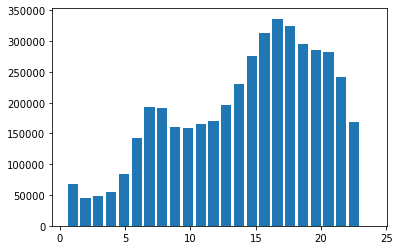

In [30]:
#Analyze the Hour
hist(uber_df.Hour, bins=24, rwidth = .8, range=(0.5, 24))

([<matplotlib.axis.XTick at 0xc6bed73a30>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

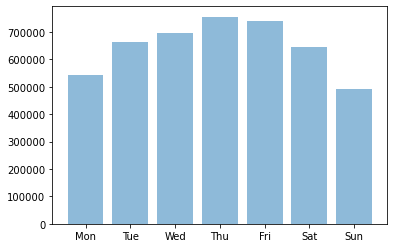

In [35]:
#Analyze the Weekday
hist(uber_df.Weekday, bins=7, range =(-.5,6.5), rwidth=.8, alpha=0.5)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

(40.7, 41.0)

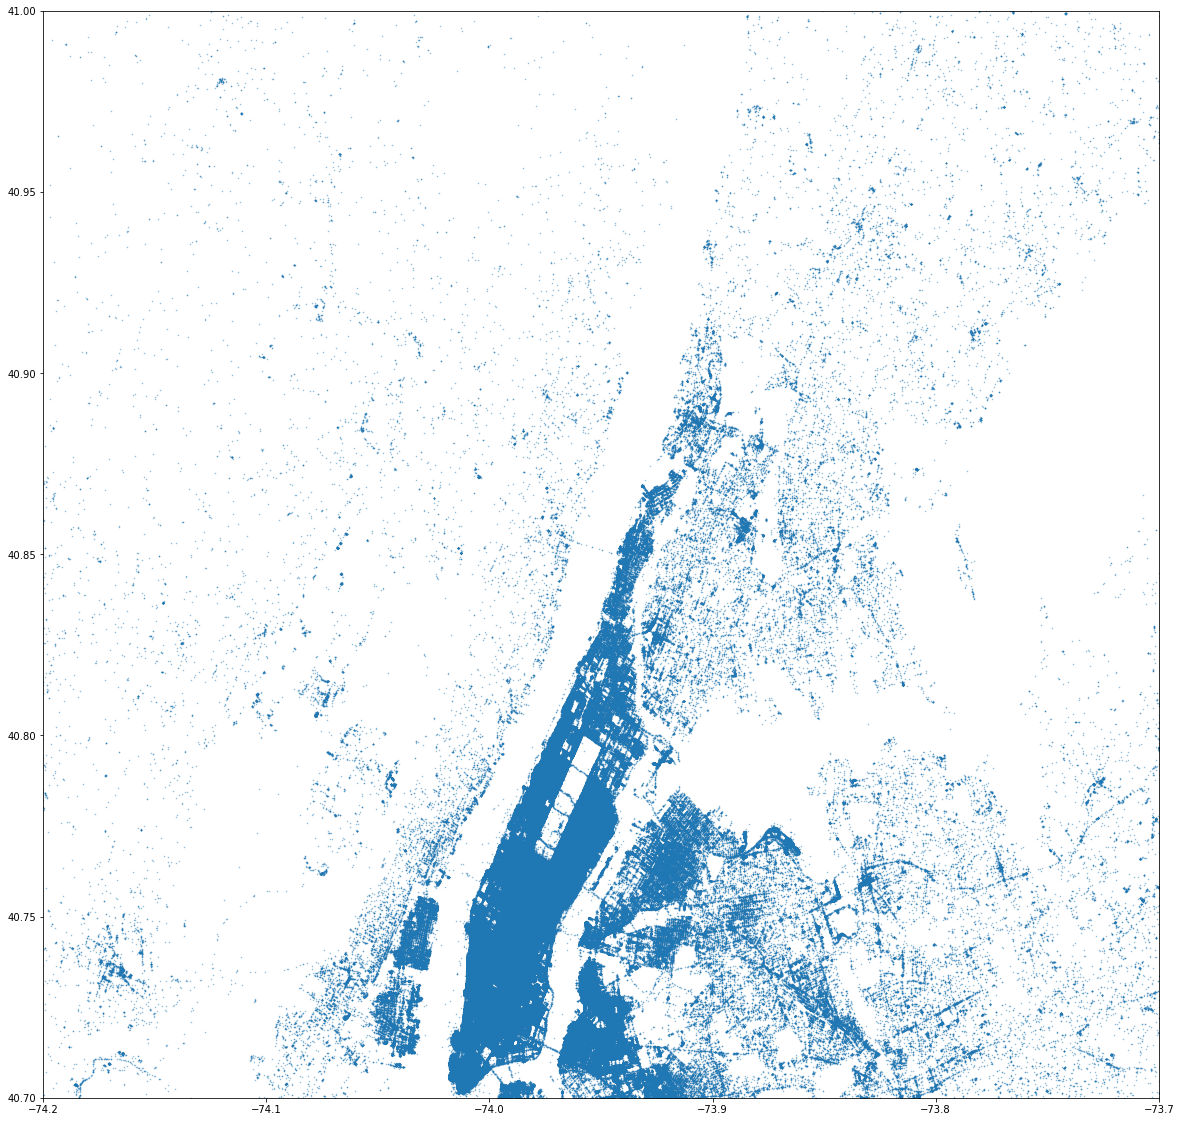

In [42]:
#Plotting of Lattitude and Logitude - Manhattan
figure(figsize=(20, 20))
plot(uber_df['Lon'], uber_df['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)